# KNN example

In [1]:
library(class)

In [2]:
library(MASS)

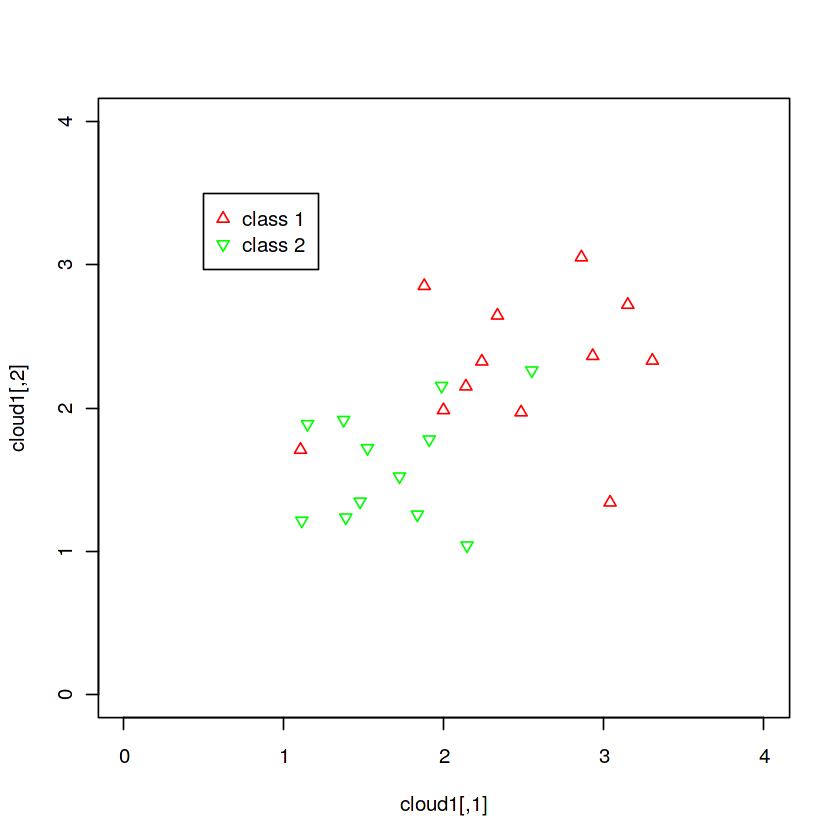

In [3]:
#sd=diag(c(.4,.2))
set.seed(25)

cloud1=mvrnorm(n=12,mu=c(2.2,2.4),Sigma=diag(c(.4,.2)))
cloud2=mvrnorm(n=12,mu=c(1.5,1.75),Sigma=diag(c(.2,.2)))
test=mvrnorm(n=15,mu=c(2,2), Sigma=diag(c(.4,.4)))

#pdf("knn-training-set.pdf")
plot(cloud1, col="red",xlim=c(0,4),ylim=c(0,4), pch=2)
points(cloud2, col="green", pch=6)
legend(.5, 3.5, c("class 1" ,"class 2"), pch=c(2,6), col=c("red", "green"))
#dev.off()


In [4]:
train=rbind(cloud1,cloud2)

In [5]:
cloud1.labels=rep(1,nrow(cloud1))

In [6]:
cloud2.labels=rep(2,nrow(cloud2))

In [7]:
train.labels=as.factor(c(cloud1.labels, cloud2.labels))

In [12]:
print(train.labels)

 [1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
Levels: 1 2


In [20]:
knn.2=knn(train, test, train.labels, k=2)
knn.1=knn(train, test, train.labels, k=1)
knn.3=knn(train, test, train.labels, k=3)


In [22]:
print(knn.1)
print(knn.2)
print(knn.3)

 [1] 1 1 1 2 2 2 1 2 1 2 1 2 2 1 1
Levels: 1 2
 [1] 2 1 1 2 2 1 1 2 1 2 1 2 2 2 1
Levels: 1 2
 [1] 1 2 1 1 2 2 1 2 1 2 1 2 2 1 1
Levels: 1 2


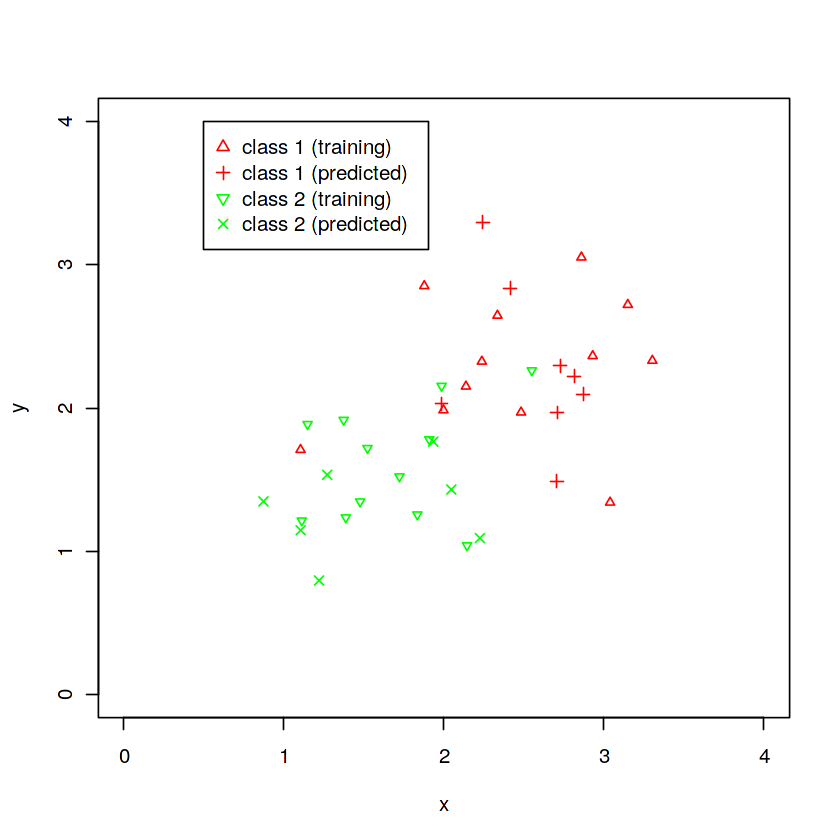

In [25]:
#pdf("knn3-results.pdf")
plot(cloud1, col="red",xlim=c(0,4),ylim=c(0,4), cex=.75, pch=2, xlab="x", ylab="y")
points(cloud2, col="green", cex=.75, pch=6)
legend(.5, 4, c("class 1 (training)" , "class 1 (predicted)", 
                "class 2 (training)", "class 2 (predicted)"), 
       pch=c(2,3, 6,4), col=c("red","red","green", "green"))
ntest=nrow(test)
for (j in 1:ntest){
    x=test[j,1]
    y=test[j,2]
    cluster=as.numeric(as.character(knn.3[j]))
    if (cluster==1){points(x,y,pch=3,col="red")}
    else {points(x,y,pch=4,col="green")}
}

#dev.off()